<a href="https://colab.research.google.com/github/PaninaEkaterina/statprak/blob/main/2_numpy%2Bmatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

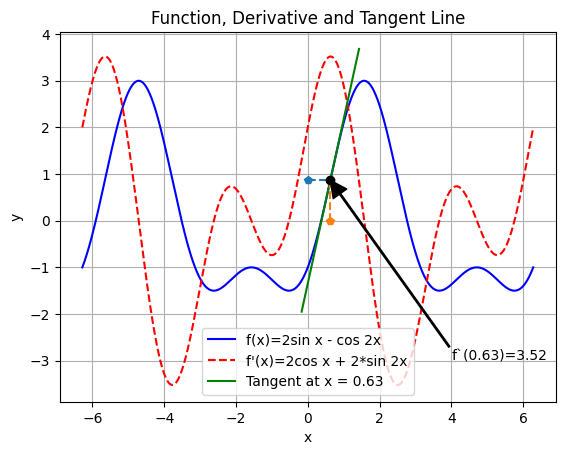

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

def beauty_derivative_plot(argument_x):
    x = np.linspace(-2*pi, 2*pi, 1000)
    f = lambda x: 2*np.sin(x)-np.cos(2*x)
    f_ = lambda x: 2*np.cos(x)+2*np.sin(2*x)
    tangent = lambda x: f_(argument_x)*(x-argument_x)+f(argument_x)

    plt.plot(x, f(x), "b-", label="f(x)=2sin x - cos 2x")
    plt.plot(x, f_(x), "r--", label="f'(x)=2cos x + 2*sin 2x")
    plt.plot([argument_x-0.8, argument_x+0.8],
    [tangent(argument_x-0.8), tangent(argument_x+0.8)],
    "g-", label=f"Tangent at x = {round(argument_x, 2)}")
    plt.plot([0, argument_x], [f(argument_x), f(argument_x)], "p--")
    plt.plot([argument_x, argument_x], [0, f(argument_x)], "p--")
    plt.plot(argument_x, f(argument_x), "ko")
    plt.annotate(f"f`({round(argument_x, 2)})={round(f_(argument_x), 2)}", xy=(argument_x, f(argument_x)),
                 xytext=(4,-3),
                 color="black", fontsize=10,
                 arrowprops={"facecolor": "black", "width": 1})
    plt.legend(loc="best")
    plt.title('Function, Derivative and Tangent Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

beauty_derivative_plot(pi*0.2)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


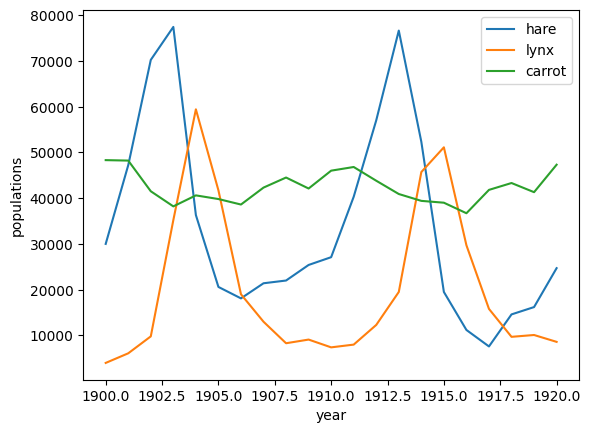

In [11]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("/content/drive/MyDrive/populations.txt")
plt.plot(data[:, 0], data[:, 1:], label=['hare', 'lynx', 'carrot'])

plt.xlabel("year")
plt.ylabel("populations")
plt.legend()
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

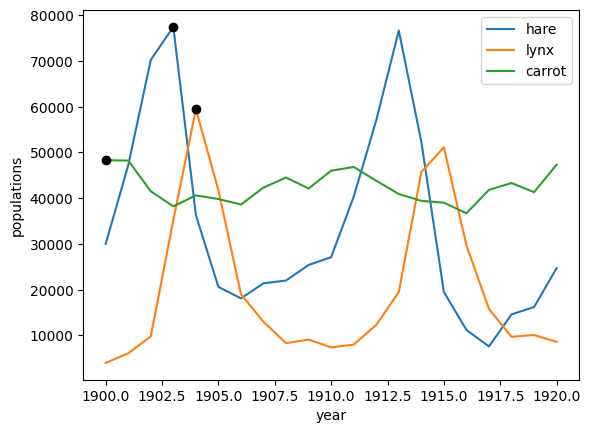

In [12]:
plt.plot(data[:, 0], data[:, 1:], label=['hare', 'lynx', 'carrot'])

animals = data[:, 1:].copy()
masked_data = animals != animals.max(axis=0)
animals[masked_data] = None
plt.plot(data[:, 0], animals, "ko")

plt.xlabel("year")
plt.ylabel("populations")
plt.legend()

plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

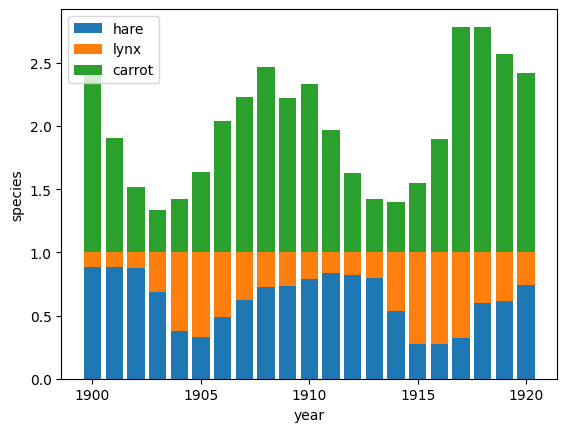

In [13]:
year, hare, lynx, carrot = data.T

d = hare + lynx
dh = hare / d
dl = lynx / d
dc = carrot / d

plt.bar(year, dh, label="hare")
plt.bar(year, dl, bottom=dh, label="lynx")
plt.bar(year, dc, bottom=dh+dl, label="carrot")

plt.xlabel("year")
plt.ylabel("species")
plt.legend()

plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

std of hare is 20897.906458089667
std of lynx is 16254.591536908763
std of carrot is 3322.5062255844787 

mean of hare is 34080.95238095238
mean of lynx is 20166.666666666668
mean of carrot is 42400.0


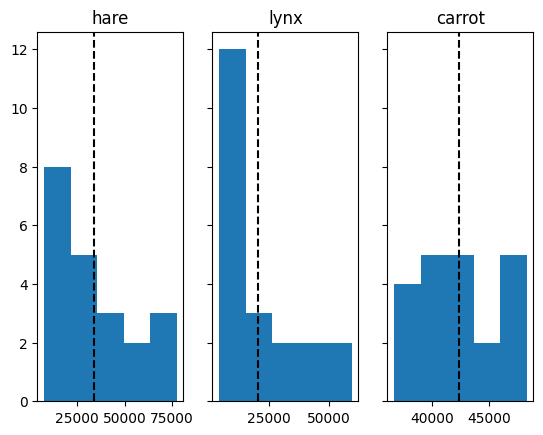

In [14]:
print("std of hare is", hare.std())
print("std of lynx is", lynx.std())
print("std of carrot is", carrot.std(), "\n")

_, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

ax1.hist(hare, bins=5)
ax1.axvline(hare.mean(), ls="--", c="k")
ax1.set_title("hare")

ax2.hist(lynx, bins=5)
ax2.axvline(lynx.mean(), ls="--", c="k")
ax2.set_title("lynx")

ax3.hist(carrot, bins=5)
ax3.axvline(carrot.mean(), ls="--", c="k")
ax3.set_title("carrot")

print("mean of hare is", hare.mean())
print("mean of lynx is", lynx.mean())
print("mean of carrot is", carrot.mean())

plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


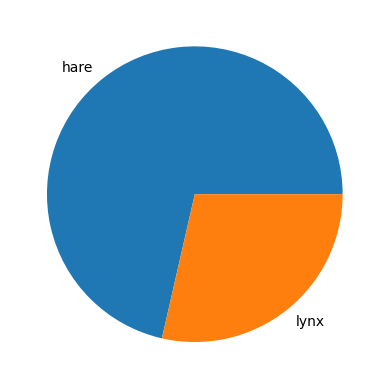

In [15]:
k = lynx - hare < 0

print(np.where(k, "H", "L"))

plt.pie(
    [k.sum(), k.size - k.sum()],
    labels=["hare", "lynx"]
)
plt.show()


- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

-0.1780136594118296


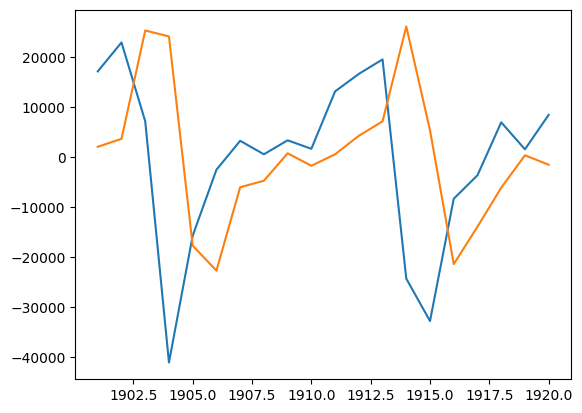

In [16]:
h = np.diff(hare)
k = np.diff(lynx)

print(np.corrcoef(h, k)[0, 1])

plt.plot(year[1:], h, label="hare")
plt.plot(year[1:], k, label="lynx")

plt.show()

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

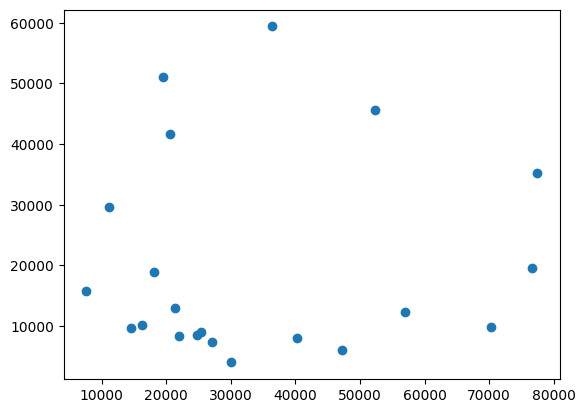

In [17]:
plt.scatter(hare, lynx)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

Predicted value: 19775.789473683108
True value: 24700.0
0.19936075005331547


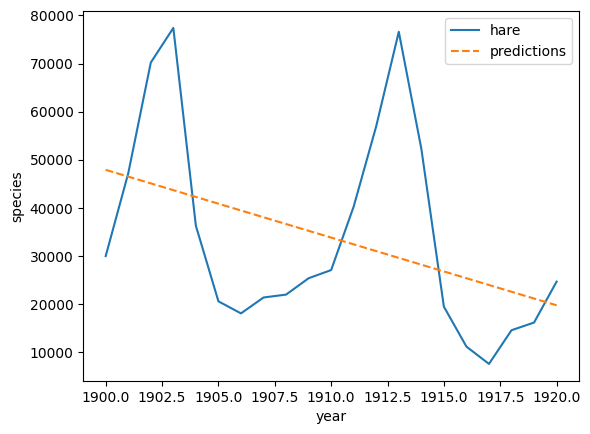

In [18]:
var = np.polyfit(year[:-1], hare[:-1],1)
regression = np.poly1d(var)
predicted_value = regression(1920)
true_value = hare[-1]

print("Predicted value:", predicted_value)
print("True value:", true_value)
print(abs((predicted_value - true_value) / true_value))

plt.plot(year, hare, label="hare")
plt.plot(year, regression(year), "--", label="predictions")

plt.xlabel("year")
plt.ylabel("species")
plt.legend()

plt.show()